# Text Representation Using Bag Of n-grams: NLP Tutorial For Beginners - 17

https://www.youtube.com/watch?v=nZromH6F7R0&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=17

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
v = CountVectorizer(ngram_range=(1, 3))
v.fit(["Emily is a good person!"])
v.vocabulary_

{'emily': 0,
 'is': 5,
 'good': 3,
 'person': 8,
 'emily is': 1,
 'is good': 6,
 'good person': 4,
 'emily is good': 2,
 'is good person': 7}

In [3]:
corpus = [
    "John is a lazy person.",
    "Emily is cool!",
    "Barbados seems a quiet place for people travelling there on vacation."
]

In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    
    # removing stop words and punctuation marks, lemmatizing text
    doc = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(doc)

preprocess("Emily is a good person!")

'Emily good person'

In [5]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['John lazy person',
 'Emily cool',
 'Barbados quiet place people travel vacation']

In [6]:
v = CountVectorizer(ngram_range=(1, 2))
v.fit(corpus_processed)
v.vocabulary_

{'john': 5,
 'lazy': 7,
 'person': 11,
 'john lazy': 6,
 'lazy person': 8,
 'emily': 3,
 'cool': 2,
 'emily cool': 4,
 'barbados': 0,
 'quiet': 14,
 'place': 12,
 'people': 9,
 'travel': 16,
 'vacation': 18,
 'barbados quiet': 1,
 'quiet place': 15,
 'place people': 13,
 'people travel': 10,
 'travel vacation': 17}

In [7]:
doc = "I am travelling on vacation"
doc = preprocess(doc)

v.transform([doc]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]],
      dtype=int64)

In [8]:
doc = "Irene is travelling on vacation"
doc = preprocess(doc)

v.transform([doc]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]],
      dtype=int64)

# News Category Classification Problem

In [9]:
import pandas as pd

df = pd.read_json('news_dataset.json')
print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [10]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

### Handle class imbalance

In [11]:
min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [12]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

### Convert text category to a number

In [13]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [14]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


### Build a model with original text (no preprocessing)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [16]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [17]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [18]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),  # using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [20]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [21]:
y_pred[:5]

array([0, 3, 3, 0, 2], dtype=int64)

In [22]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

### Attempt 2 : Use 1-gram and bigrams

In [23]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



### Attempt 3 : Use 1-gram to trigrams

In [24]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [25]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 

In [26]:
df_balanced['preprocessed_txt'] = df_balanced['preprocessed_txt'].apply(lambda x: x.lower())

In [27]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc business leader remain confident face regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,honest review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,mike mcderment ceo freshbooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel world recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


### Build a model with pre processed text

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [29]:
print(X_train.shape)
X_train.head()

(4419,)


7589     ovulate woman prefer images penetration image ...
10442     scientist discover spooky influence baby choices
8792     olympic race walker step propose boyfriend rio...
1733     beloved bipedal bear name pedals believe kill ...
2526       elizabeth smart give birth baby girl father say
Name: preprocessed_txt, dtype: object

In [30]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [31]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [32]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.83      0.87       277
           2       0.83      0.92      0.87       276
           3       0.91      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



### Plot confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[242,   9,  15,  10],
       [ 10, 230,  29,   8],
       [ 15,   1, 255,   5],
       [ 34,  10,   8, 224]], dtype=int64)

Text(69.0, 0.5, 'Truth')

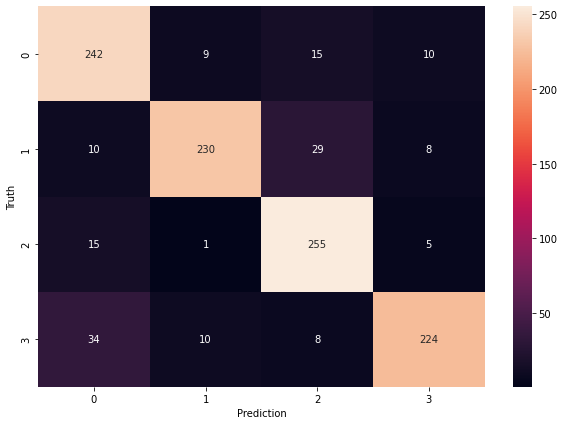

In [34]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')